<a href="https://colab.research.google.com/github/kimdesok/FinanceDataReader/blob/master/MarketIndexTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install finance-dataReader==0.5.0

In [22]:
import FinanceDataReader as fdr

<class 'dict'> 
 dict_keys(['Nasdaq', 'S&P500', 'Dow Jones', 'KOSPI', 'KOSDAQ', 'CSI 300', 'Hangseng']) 
 dict_values(['IXIC', 'US500', 'DJI', 'KS11', 'KQ11', 'CSI300', 'HSI'])
Nasdaq <class 'str'>
S&P500 <class 'str'>
Dow Jones <class 'str'>
KOSPI <class 'str'>
KOSDAQ <class 'str'>
CSI 300 <class 'str'>
Hangseng <class 'str'>

 <class 'dict_items'> dict_items([('Nasdaq', 'IXIC'), ('S&P500', 'US500'), ('Dow Jones', 'DJI'), ('KOSPI', 'KS11'), ('KOSDAQ', 'KQ11'), ('CSI 300', 'CSI300'), ('Hangseng', 'HSI')])
Nasdaq <class 'str'> IXIC <class 'str'>
S&P500 <class 'str'> US500 <class 'str'>
Dow Jones <class 'str'> DJI <class 'str'>
KOSPI <class 'str'> KS11 <class 'str'>
KOSDAQ <class 'str'> KQ11 <class 'str'>
CSI 300 <class 'str'> CSI300 <class 'str'>
Hangseng <class 'str'> HSI <class 'str'>
('Nasdaq', 'IXIC') <class 'tuple'>
('S&P500', 'US500') <class 'tuple'>
('Dow Jones', 'DJI') <class 'tuple'>
('KOSPI', 'KS11') <class 'tuple'>
('KOSDAQ', 'KQ11') <class 'tuple'>
('CSI 300', 'CSI300') <cla

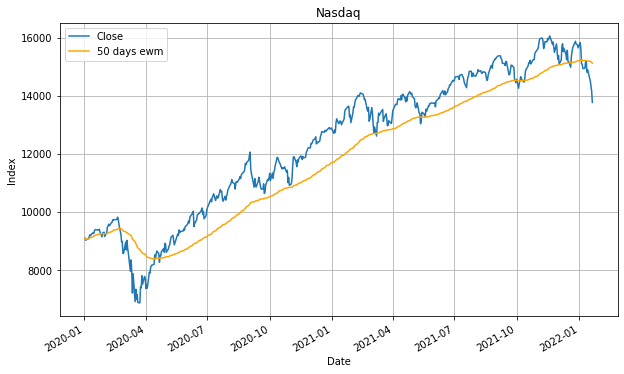

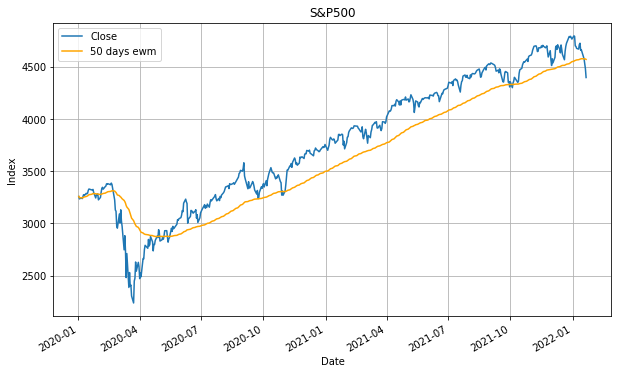

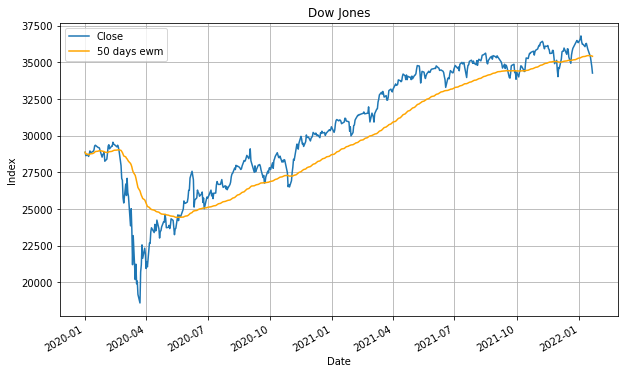

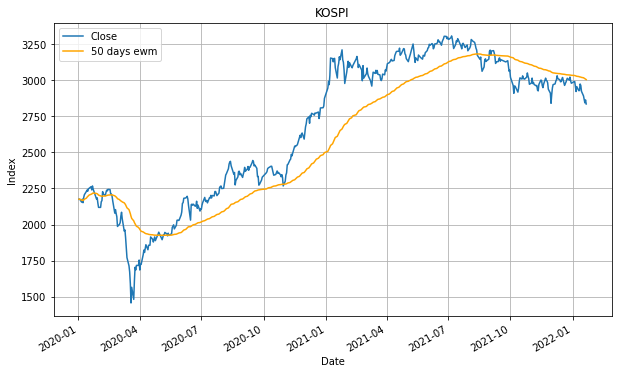

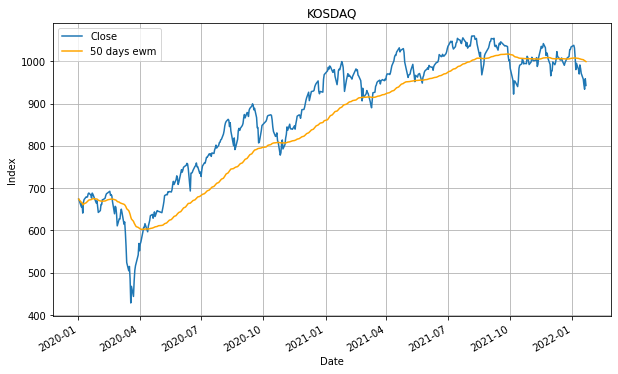

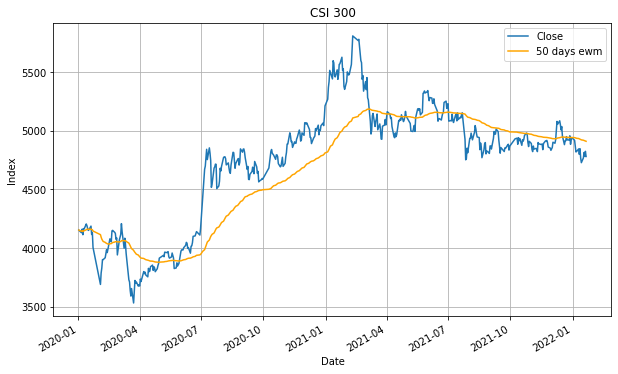

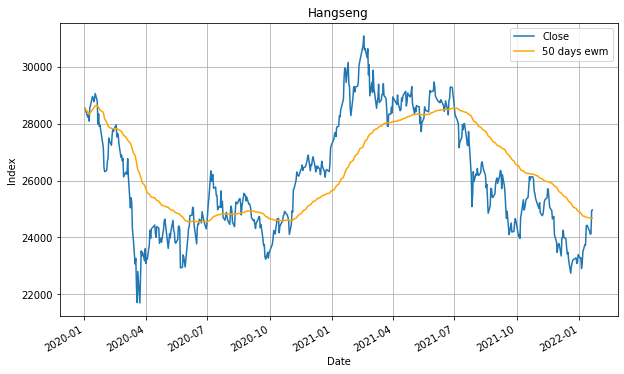

In [25]:
import matplotlib.pyplot as plt

market_list = {'Nasdaq':'IXIC','S&P500':'US500', 'Dow Jones':'DJI', 'KOSPI':'KS11', 'KOSDAQ':'KQ11', 'CSI 300': 'CSI300', 'Hangseng':'HSI'	}

for name, code in market_list.items() :
  df = fdr.DataReader(code, start='2020', data_source='fred')
  #df.info()

  plt.figure(figsize=(10, 6))
  h0 = df['Close'].plot()
  Roll_Exponentional_Mean = df['Close'].ewm(50, min_periods=1).mean()
  h1 = Roll_Exponentional_Mean.plot(color='orange', label='50 days ewm')
  plt.ylabel('Index')
  plt.title(name)
  plt.legend()
  plt.grid(True)
  plt.show()


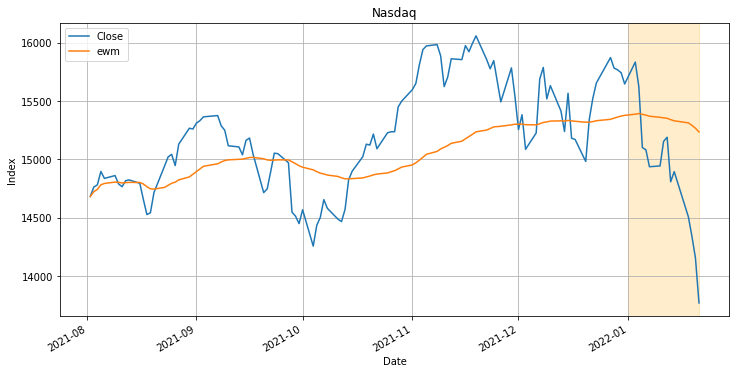

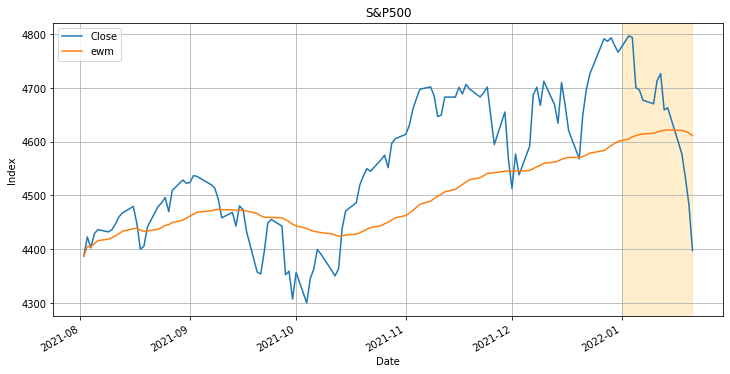

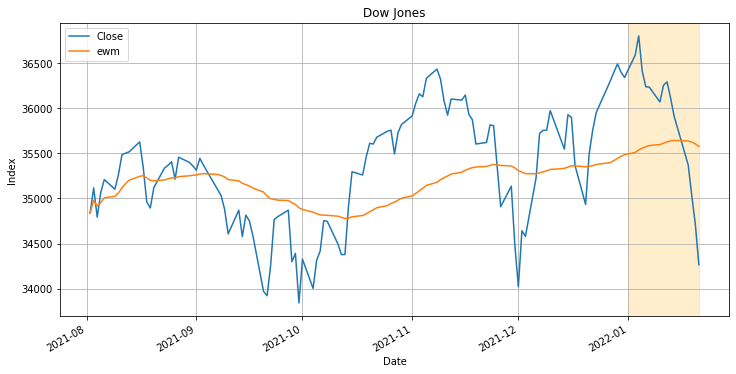

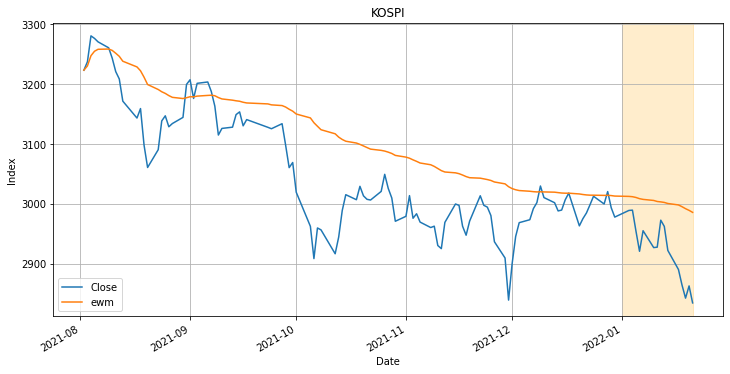

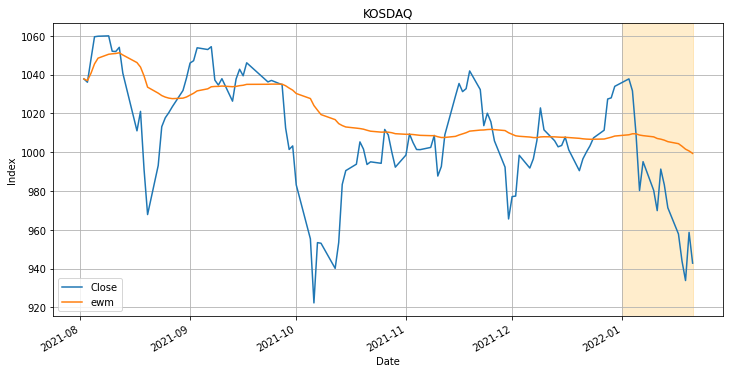

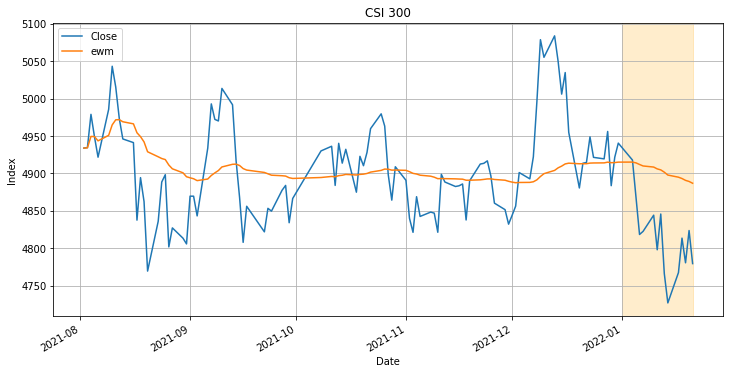

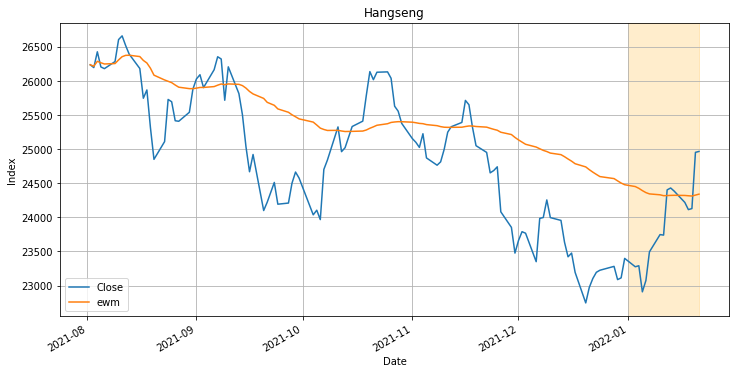

In [24]:
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

for name, code in market_list.items() :
  df = fdr.DataReader(code, start='2021-08-01', data_source='fred')
  df['ewm'] = df['Close'].ewm(50, min_periods=1).mean()
  #plt.figure(figsize=(10, 6))
  df = df[['Close','ewm']]
  ax = df.plot()
  ax = ax.axvspan('2022-01-01', '2022-01-21', color='orange', alpha=0.2)
  
  plt.ylabel('Index')
  plt.title(name)
  plt.legend()
  plt.grid(True)
  plt.show()